![title](./deep.png)

## IMPORT LIBRAIRIES

In [1]:
import numpy as np  #
import pandas as pd #
import random as rn #
import os #
import matplotlib.pyplot as plt #
import seaborn as sns #
#pwd
import cv2                  
from tqdm import tqdm #
from random import shuffle #
from zipfile import ZipFile#
from PIL import Image #
from sklearn.metrics import confusion_matrix,classification_report


## Modèle AUTOCENCODER

In [2]:
# On va lister nos données dans notre répétoire où se trouve tous les fichiers de nos datas 
print(os.listdir('./Input/PAYS'))

['USA', 'Luxembourg', '.DS_Store', 'Belgique', 'France', 'Espagne']


In [3]:
# on va créer deux listes vides pour nos variables de training X et Y
X=[]
y=[]
# Ensuite pour la taille on prends 100
IMG_SIZE=100

#On va mettre les liens de nos fichiers images 
Belgique='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/Belgique'
Espagne='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/Espagne'
France='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/France'
Luxembourg='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/Luxembourg'
#Monaco='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/Monaco'
USA='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/USA'

# On va créer une boucle pour assigner les images et les types de pays
def assign_label(img,pays_type):
    return pays_type

# On va décharger nos datas avec CV2  
def make_train_data(pays_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,pays_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        y.append(str(label))

make_train_data('Belgique',Belgique)

make_train_data('Espagne',Espagne)

make_train_data('France',France)

make_train_data('Luxembourg',Luxembourg)

make_train_data('USA',USA)

100%|██████████| 1000/1000 [00:06<00:00, 151.48it/s]


## Reshape et Rescale les Images pour Autoencodeurs.

Le générateur utilisera la fonction d'activation de relu pour la dernière couche, nous voulons donc remodeler X_train pour qu'il soit dans les limites de 0 à 1.

In [4]:
X=np.array(X).reshape(-1,100,100,3)/255

In [5]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Dropout,LeakyReLU,Flatten,BatchNormalization,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Sequential

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [8]:

X.shape # on a 100 fois 100 = 10000 fetures/dimension 

(5000, 100, 100, 3)

In [9]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GaussianNoise

In [10]:
# Crée exactement le même bruit que la formation (facultatif)
tf.random.set_seed(101)
np.random.seed(101)
encoder = Sequential()
encoder.add(Flatten(input_shape=[100,100,3]))
# Ajouter du bruit aux images avant de passer par l'auto-encodeur
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation="relu")) # on divise par 25 
encoder.add(Dropout(0.2))
encoder.add(Dense(200, activation="relu"))
encoder.add(Dropout(0.2))
encoder.add(Dense(100, activation="relu"))
encoder.add(Dropout(0.2))


In [11]:
decoder = Sequential()# on va la récréer avec notre décodeur
decoder.add(Dense(200,input_shape=[100],activation='relu')) # 100 le lien entre encodeur et de décodeur 
decoder.add(Dropout(0.2))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dropout(0.2))
decoder.add(Dense(100 * 100 * 3, activation="sigmoid"))
decoder.add(Reshape([100, 100,3]))# pour avoir la même forme d'origine

In [12]:
noise_remover = Sequential([encoder, decoder])

In [13]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy']) # la sigmoid permet de vérifier si l'entrée et la sortie match 

In [14]:
noise_remover.fit(x_train, x_train, epochs=7,
                           validation_data=(x_test, x_test))

Epoch 1/7
125/125 [==============================] - 58s 439ms/step - loss: 0.5403 - accuracy: 0.4469 - val_loss: 0.4859 - val_accuracy: 0.5479
Epoch 2/7
125/125 [==============================] - 43s 345ms/step - loss: 0.4914 - accuracy: 0.5088 - val_loss: 0.4845 - val_accuracy: 0.5323
Epoch 3/7
125/125 [==============================] - 49s 389ms/step - loss: 0.4849 - accuracy: 0.5185 - val_loss: 0.4848 - val_accuracy: 0.5162
Epoch 4/7
125/125 [==============================] - 54s 431ms/step - loss: 0.4809 - accuracy: 0.5254 - val_loss: 0.4782 - val_accuracy: 0.5423
Epoch 5/7
125/125 [==============================] - 38s 307ms/step - loss: 0.4773 - accuracy: 0.5263 - val_loss: 0.4801 - val_accuracy: 0.5286
Epoch 6/7
125/125 [==============================] - 47s 380ms/step - loss: 0.4731 - accuracy: 0.5263 - val_loss: 0.4750 - val_accuracy: 0.5083
Epoch 7/7
125/125 [==============================] - 43s 344ms/step - loss: 0.4707 - accuracy: 0.5313 - val_loss: 0.4732 - val_accuracy:

In [15]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

In [16]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

L'originale


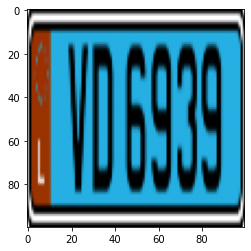

La version avec du bruit


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


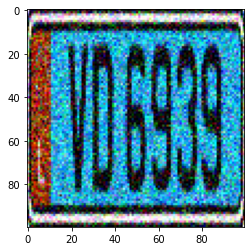

Après le Débruitage


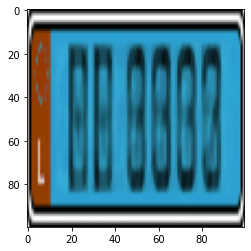

In [31]:
n = 8
print("L'originale")
plt.imshow(x_test[n])
plt.show()
print("La version avec du bruit")
plt.imshow(ten_noisey_images[n])
plt.show()
print("Après le Débruitage")
plt.imshow(denoised[n])
plt.show()